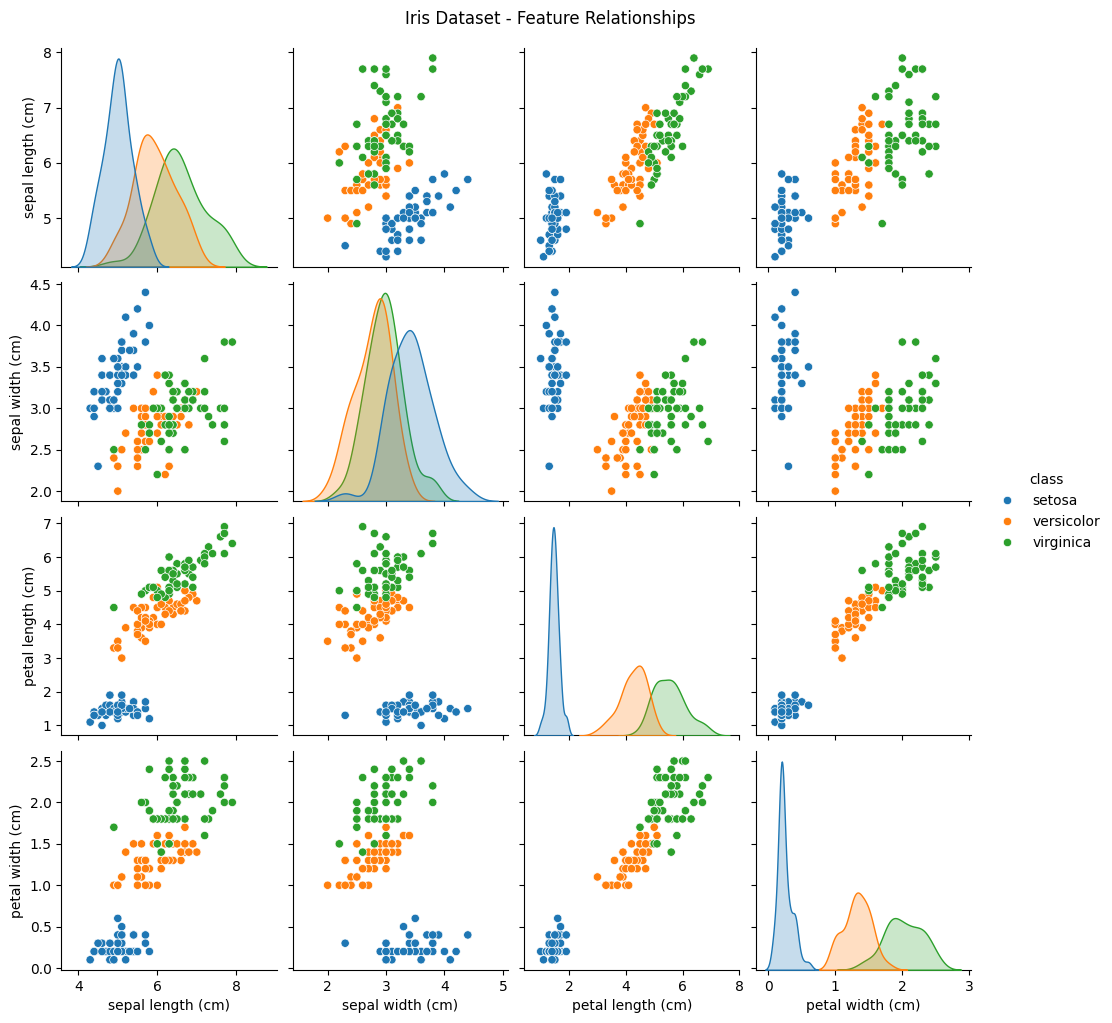

Test Accuracy: 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30


95% Confidence Interval (Binomial): [0.787, 0.982]
95% Confidence Interval (Bootstrap): [0.833, 1.000]
Average crossval accuracy: 0.949 ± 0.038

Final model trained on the entire dataset.
Pessimistic accuracy estimate (from cross-validation): 0.949


In [5]:
# ============================
# IRIS CLASSIFICATION ANALYSIS USING KNN
# ============================

# --- 1. Imports ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report
)
from sklearn.utils import resample
from statsmodels.stats.proportion import proportion_confint


# --- 2. Load and visualize dataset ---
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="class").map(dict(zip(range(3), iris.target_names)))

# Pairplot to visualize clusters
sns.pairplot(pd.concat([X, y], axis=1), hue="class", diag_kind="kde")
plt.suptitle("Iris Dataset - Feature Relationships", y=1.02)
plt.show()


# --- 3. Split data into training and test sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# --- 4. Feature scaling ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# --- 5. Train KNN model (default hyperparameters) ---
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# --- 6. Evaluate on test set ---
y_pred = knn.predict(X_test_scaled)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- 7. Confidence intervals for accuracy ---

# (a) Binomial confidence interval
n = len(y_test)
acc = accuracy_score(y_test, y_pred)
ci_low, ci_high = proportion_confint(count=int(acc*n), nobs=n, alpha=0.05, method='wilson')
print(f"\n95% Confidence Interval (Binomial): [{ci_low:.3f}, {ci_high:.3f}]")

# (b) Bootstrap confidence interval
n_bootstraps = 1000
boot_scores = []
for _ in range(n_bootstraps):
    indices = resample(range(n))
    boot_scores.append(accuracy_score(y_test.iloc[indices], y_pred[indices]))

ci_boot = np.percentile(boot_scores, [2.5, 97.5])
print(f"95% Confidence Interval (Bootstrap): [{ci_boot[0]:.3f}, {ci_boot[1]:.3f}]")


# --- 8. Cross-validation for more robust accuracy estimation ---
random_seed = 42
kf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=random_seed)
xval_scores = cross_val_score(knn, scaler.fit_transform(X), y, scoring='accuracy', cv=kf)

print(f"Average crossval accuracy: {xval_scores.mean():.3f} ± {xval_scores.std():.3f}")


# --- 9. Final model fitted on all data ---
# As per standard practice: train on all data, report pessimistic estimate from CV
final_model = KNeighborsClassifier(n_neighbors=5)
final_model.fit(scaler.fit_transform(X), y)

print("\nFinal model trained on the entire dataset.")
print(f"Pessimistic accuracy estimate (from cross-validation): {xval_scores.mean():.3f}")